# 타이타닉 - kaggle

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
print(pd.__version__)
print(sns.__version__)
print(np.__version__)

1.4.4
0.12.0
1.23.2


In [105]:
train_df=pd.read_csv("titanic/train.csv")
test_df=pd.read_csv("titanic/test.csv")
print(train_df.shape, test_df.shape)

(891, 12) (418, 11)


In [106]:
train_df.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S


In [107]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S


### 칼럼(피쳐스, features)
- Survived : 생존여부 0 = No, 1 = Yes
- Pclass : 티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex : 성별
- Age : 나이
- SibSp : 형제, 자매, 배우자가 배에 탄 수
- Parch : 부모, 자식(직계가족)이 배에 탄 수
- Ticket : 티켓 번호
- Fare : 지불 금액
- Cabin : 객실 번호
- Embarked :  승선항 C = Cherbourg, Q = Queenstown, S = Southampton

### 범주형
- 명목형 : Survived, Sex, Embarked
- 순서형 : Pclass

### 숫자형
- 연속형 : Age, Fare
- 이산형 : SibSp, Parch

### 혼합 데이터 유형
- Ticket
- Cabin

### 오류 또는 오타 있을 수 있는 데이터
- Name

### 빈 값이 포함된 칼럼
- Cabin, Age, Embarked (많은 순)

### Object
- 6개의 칼럼(Name, Sex, Ticket, Cabin, Embarked)
- 숫자형은 7개

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 수치 값의 분포
- 실제 탑승자(2,224명)의 40% 정도 되는 891명
- 35% 정도 생존, 실제 생존율 38%
- 대부분 승객(75%)은 부모나 자녀와 함께 여행하지 않았다
- 승객의 30% 가까이가 형제, 자매, 배우자 한 명과 탑승했다
- 요금은 다양하게 지불
- 20~38세가 가장 많고 최고령은 80세

In [109]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 범주형 칼럼의 분포
- 이름은 전체에서 고유
- 남성이 65%, 여성이 35% 정도
- Cabin 값은 중복이 되고 여러 명의 승객이 객실을 공유했다
- 3곳의 항구에서 승객이 탑승했고, 대부분 승객이 S항(사우스햄튼)에서 승선했다
- Ticket은 중복된 값이 22%로 높다

In [110]:
train_df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 데이터 분석을 기반으로 가정
#### 상관
 상관 관계 찾기
 
#### 완료(완성)
 1. Age는 상관관계가 높기 때문에 결측치를 처리해서 완성
 2. Embarked 결측치를 처리해서 완성

#### 수정
 1. Ticket 제외될 수 있다
 2. Cabin 결측치가 너무 많아서 제외될 수 있다
 3. PassengerId 제외될 수 있다
 4. Name 제외될 수 있다
 
#### 생성
 1. Parch, SibSp 총 가족 수로 변환
 2. Name 칼럼에서 Title 새 칼럼으로 추출할 수 있다
 3. 나이(Age) 범위를 새롭게 칼럼으로 만들 수 있다
 4. 학습에 도움이 될 경우 요금(Fare) 범주형으로 만들 수 있다
 
#### 분류
 1. 여성이 생존했을 가능성이 높다
 2. 어린이가 생존했을 가능성이 높다
 3. 상류층 승객이 더 생존했을 가능성이 높다

### 피봇 피쳐로 분석
 상관 관계를 신속하게 분석, 빈 값이 없는 칼럼(피쳐)에 대해 작업, 명목형(Sex), 순서형(Pclass), 이산형(SibSp, Parch)
 
 - **PClass**  유의미한 상관관계가 있다. 피쳐(칼럼)를 우리 모델에 포함
 - **Sex**  여성의 생존율이 거의 74%, 남성의 생존율이 거의 19%
 - **SibSp, Parch**  상관관계가 별로 없다. 가족 수라는 새로운 칼럼으로 도출해보자

In [111]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [112]:
train_df[["Sex", "Survived"]].groupby(["Sex"]).mean().sort_values(by="Survived", ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [113]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"]).mean().sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [114]:
train_df[["Parch", "Survived"]].groupby(["Parch"]).mean().sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


## 데이터를 시각화하여 분석
### 수치 특성의 상관관계
 - 수치 특성과 Survived 사이의 상관관계 이해
 - 히스토그램 col - Survived, x - 수치 특성
 
**관찰**
 - 유아(나이<=5세) 생존율이 높았다
 - 80세 승객은 생존했다
 - 15-25세의 승객 중 많은 수가 살아남지 못했다
 - 대부분 승객은 15-35세 사이다
 
**결정 사항**
 - 모델 훈련에서 나이를 고려해 볼 수 있다
 - null값을 처리해서 나이를 완성해야 된다
 - 나이 범위 그룹으로 만들어야 된다

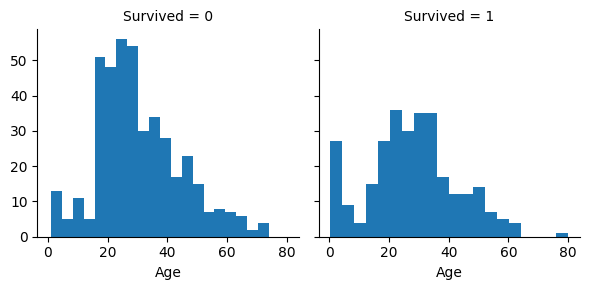

In [115]:
g=sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins=20)

### 상관관계 확인 : 명목형과 순서형의 피쳐들
Pclass 시각화

**관찰**
 - Pclass=3 승객 대부분 살아 남지 못했다
 - Pclass=3, Pclass=2, Pclass=1 유아 승객의 생존 비율이 높았다
 - Pclass=1 승객 대부분은 생존
 - Pclass는 승객 연령 분포가 다양하다
 
**결정 사항**
 - 모델 학습을 위해 Pclass는 고려한다

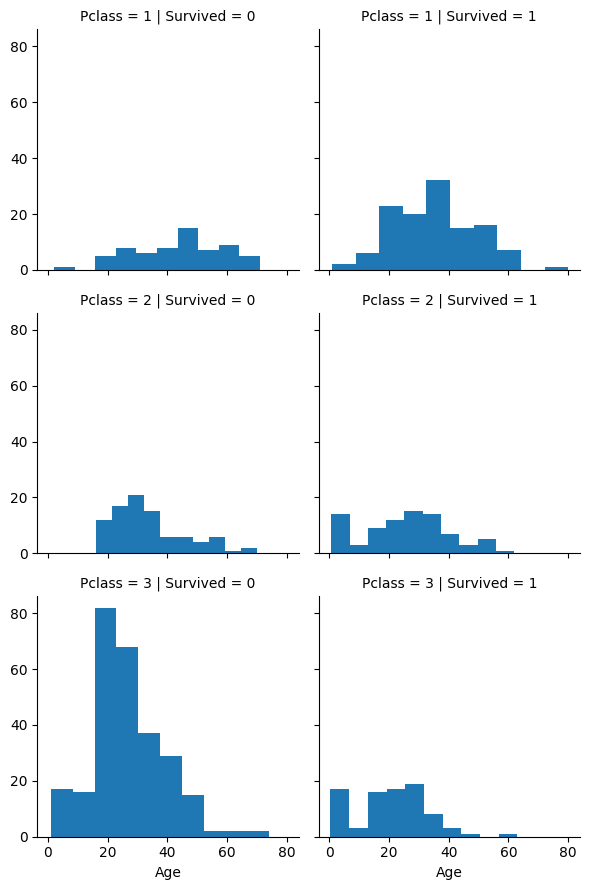

In [116]:
g=sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, "Age")

## 범주형 피쳐 상관관계
승선항, 성별, 좌석등급에 대해 시각화

**관찰**
 - 여성 승객이 남성 승객보다 생존율이 높다.
 - C 승선항은 남성이 더 생존했고, PClass와 Embarked의 상관관계일 수 있다. PClass와 Survived와의 상관관계가 깊다.
 
**결정 사항**
 - 모델 학습에서 성별 피쳐를 추가
 - 모델 학습에서 승선항도 완성을 시켜서 추가

C:\Users\KB\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\KB\miniconda3\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


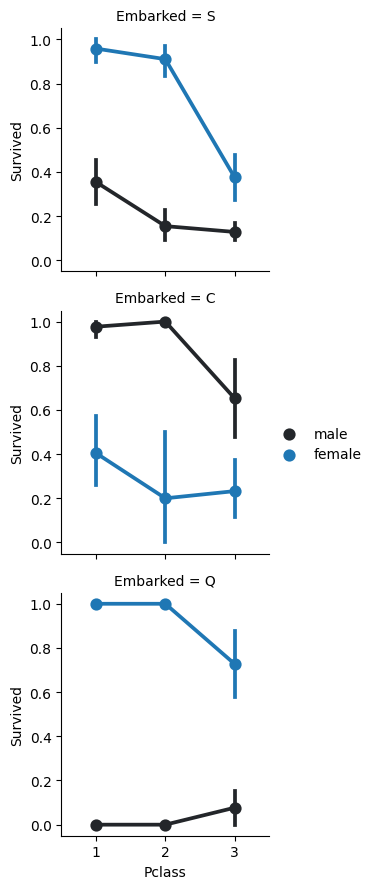

In [117]:
g=sns.FacetGrid(train_df, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()

### 범주형 및 숫자형 피쳐의 상관관계
승선항, 성별, 요금, 생존 상관관계를 고려

**관찰**
 - 요금을 더 많이 낸 승객이 많이 생존했다
 - 승선항도 생존율과 상관관계가 있다
 
**결정**
 - 요금 범위를 만들어서 피쳐로 활용해 볼 수 있다
 - 승선항도 피쳐로 활용한다

C:\Users\KB\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


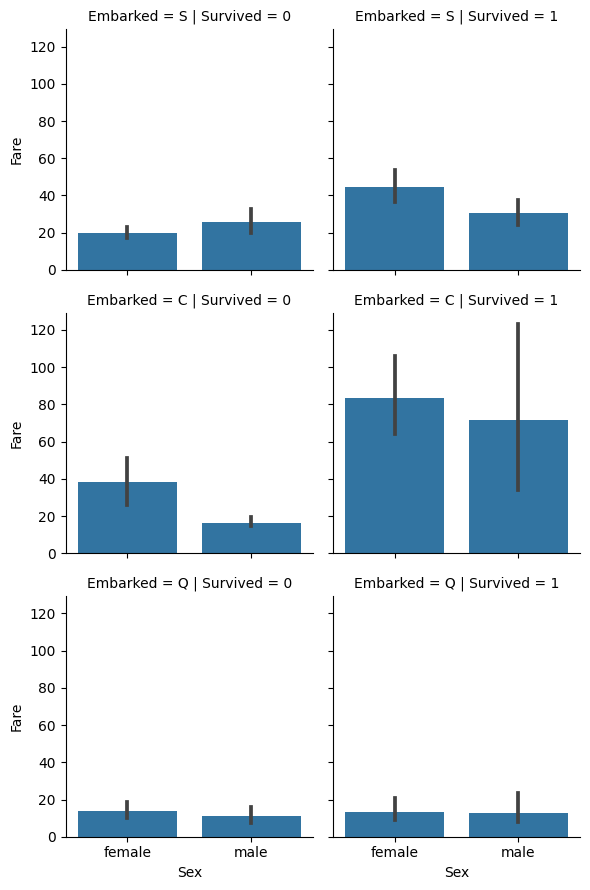

In [118]:
g=sns.FacetGrid(train_df, row="Embarked", col="Survived")
g.map(sns.barplot, "Sex", "Fare")

- 몇가지 가정과 결정을 수집
- 결정한 것을 수정, 생성 및 완료

### 피쳐를 삭제
(과대 적합 - 상관관계가 없는 칼럼이나 표준편차에 벗어나는 값들이 너무 많이 존재하는 상태)

객실과 티켓 피쳐 삭제

In [119]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S


In [120]:
print("Before", train_df.shape, test_df.shape)

# pop() 혹은 drop() 사용
# drop() -> axis (0 = 행 삭제, 1 = 칼럼 삭제)

train_df=train_df.drop(["Ticket", "Cabin"], axis=1)
test_df=test_df.drop(["Ticket", "Cabin"], axis=1)

combine=[train_df, test_df]

print("After", train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


### 기존 피쳐에서 추출하여 새 피쳐 작성
1. Name 피쳐(칼럼)에서 타이틀을 추출
2. PId 삭제


In [121]:
for dataset in combine:
    print(dataset.shape)

(891, 10)
(418, 9)


In [122]:
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [123]:
# 일반적인 타이틀로 수정
# 너무 적은 타이틀은 "희귀한"으로 변경
for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(["Lady", "Countess", "Capt","Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer"], "Rare")
    dataset["Title"]=dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"]=dataset["Title"].replace("Ms", "Miss")
    dataset["Title"]=dataset["Title"].replace("Mme", "Mrs")

train_df[["Title","Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [124]:
# 범주형 문자열 타이틀을 순서형 숫자로 변환
title_mapping={"Mr":1, "Miss":2, "Master":4, "Rare":5}
for dataset in combine:
    dataset["Title"]=dataset["Title"].map(title_mapping)
    dataset["Title"]=dataset["Title"].fillna(0)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,7.7750,S,1.0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,35.5000,S,1.0
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,7.9250,S,1.0
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,8.0500,S,1.0
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,7.8542,S,2.0


In [125]:
# 이름 피쳐 삭제
# 승객아이디 삭제
train_df=train_df.drop(["Name", "PassengerId"], axis=1)
test_df=test_df.drop(["Name"], axis=1)
combine=[train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [126]:
# Run > Run All Cells

In [127]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
191,0,2,male,19.0,0,0,13.000,S,1.0
185,0,1,male,NaN,0,0,50.000,S,1.0
683,0,3,male,14.0,5,2,46.900,S,1.0
7,0,3,male,2.0,3,1,21.075,S,4.0
47,1,3,female,NaN,0,0,7.750,Q,2.0


### 범주형 문자 피쳐 변환
- 문자열을 포함하는 피쳐를 숫자로 변환
- 성별 여성=1, 남성=0 으로 변환

In [128]:
for dataset in combine:
    dataset["Sex"]=dataset["Sex"].map({"female":1, "male":0}).astype(int)
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
756,0,3,0,28.0,0,0,7.7958,S,1.0
410,0,3,0,NaN,0,0,7.8958,S,1.0
570,1,2,0,62.0,0,0,10.5000,S,1.0
677,1,3,1,18.0,0,0,9.8417,S,2.0
810,0,3,0,26.0,0,0,7.8875,S,1.0


### 결측값 처리해서 완료
1. 너무 적을 때 삭제
2. 평균이나 최빈도수로 삽입
3. 평균과 표준편차 사이의 난수를 생성
4. 다른 피쳐들과의 상관관계를 찾아서 삽입
5. 위에 방법들을 조합해서 사용

In [129]:
# 결측치 확인
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64


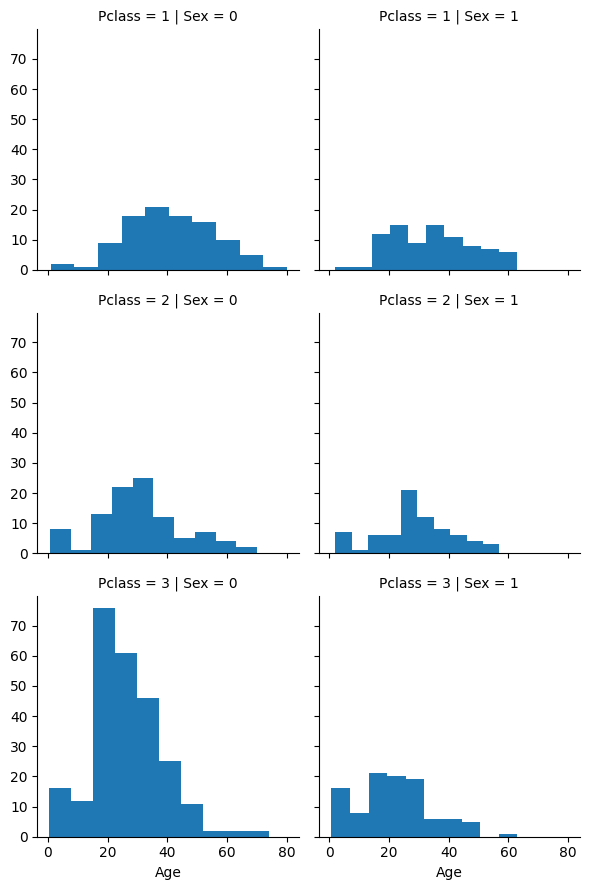

In [130]:
# 나이 Pclass X Gender
g=sns.FacetGrid(train_df, row="Pclass", col="Sex")
g.map(plt.hist, "Age")

In [131]:
# Pclass, Gender 3*2 리스트
# 1-0 or 1
# [[0, 0, 0], [0, 0, 0]]
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [132]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Sex"]==i)&(dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1), "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [133]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [134]:
# Age를 범위 밴드형으로 만들고 생존 상관관계를 확인
# 예) 0~5세, 6~10세
# cut - 데이터를 동일한 길이로 나눠줌
train_df["AgeBand"]=pd.cut(train_df["Age"], 5)
train_df[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand")

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [135]:
# g1=sns.FacetGrid(train_df, row="AgeBand", col="Survived")
# g1.map(plt.hist, "Pclass")

In [136]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
327,1,2,1,36,0,0,13.0000,S,0.0,"(32.0, 48.0]"
471,0,3,0,38,0,0,8.6625,S,1.0,"(32.0, 48.0]"
335,0,3,0,26,0,0,7.8958,S,1.0,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,0.0,"(32.0, 48.0]"
656,0,3,0,26,0,0,7.8958,S,1.0,"(16.0, 32.0]"


In [137]:
# Age를 서수로 대체
for dataset in combine:
    dataset.loc[dataset["Age"]<=16, "Age"]=0
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=32), "Age"]=1
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<=48), "Age"]=2
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<=64), "Age"]=3
    dataset.loc[dataset["Age"]>64, "Age"]=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,0.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,0.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [138]:
# AgeBand는 삭제
train_df=train_df.drop(["AgeBand"], axis=1)
combine=[train_df, test_df]
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,1,0,0,13.00,S,5.0
887,1,1,1,1,0,0,30.00,S,2.0
888,0,3,1,1,1,2,23.45,S,2.0
889,1,1,0,1,0,0,30.00,C,1.0
890,0,3,0,1,0,0,7.75,Q,1.0


### 기존 피쳐를 결합한 새 피쳐 작성
Parch와 Sibsp를 결합한 FamilySize라는 새로운 피쳐를 생성하고, 이를 통해서 기존 피쳐는 삭제 가능

In [139]:
for dataset in combine:
    dataset["FamilySize"]=dataset["Parch"]+dataset["SibSp"]+1
train_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [140]:
# 가족과 함께 탑승, 홀로 탑승
# IsAlone이라는 피쳐를 생성
for dataset in combine:
    dataset["IsAlone"]=0
    dataset.loc[dataset["FamilySize"]>1, "IsAlone"]=1
train_df[["IsAlone", "Survived"]].groupby(["IsAlone"]).mean()

,Survived
IsAlone,
0,0.303538
1,0.505650


In [141]:
# Parch, SibSp, FamilySize 삭제
train_df=train_df.drop(["Parch", "SibSp", "FamilySize"], axis=1)
test_df=test_df.drop(["Parch", "SibSp", "FamilySize"], axis=1)
combine=[train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1.0,1
1,1,1,1,2,71.2833,C,0.0,1
2,1,3,1,1,7.9250,S,2.0,0
3,1,1,1,2,53.1000,S,0.0,1
4,0,3,0,2,8.0500,S,1.0,0


In [142]:
# 혼자 탑승 = 0, 함께 탑승 = 1

In [143]:
# Pclass * Age 새로운 피쳐 생성
for dataset in combine:
    dataset["Age*Pclass"]=dataset["Age"]*dataset["Pclass"]
train_df[["Age*Pclass", "Age", "Pclass"]].head(10)

,Age*Pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### 범주형 피쳐 완성
승선항 결측치 처리
- 가장 흔한 값으로 채운다

In [144]:
#최빈값 mode()
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [145]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].fillna(freq_port)
train_df[["Embarked", "Survived"]].groupby(["Embarked"]).mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


### 변환: 카테고리형 피쳐를 숫자형으로
승선항을 숫자형으로 변환

In [146]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    int32  
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Title       891 non-null    float64
 7   IsAlone     891 non-null    int64  
 8   Age*Pclass  891 non-null    int64  
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare       

(None, None)

In [147]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].map({"S":0, "Q":1, "C":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,7.2500,0,1.0,1,3
1,1,1,1,2,71.2833,2,0.0,1,2
2,1,3,1,1,7.9250,0,2.0,0,3
3,1,1,1,2,53.1000,0,0.0,1,2
4,0,3,0,2,8.0500,0,1.0,0,6


In [148]:
# 요금에서 결측치
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Pclass     0
dtype: int64

In [149]:
# 요금의 표준편차 중앙값으로 삽입하여 결측치 처리
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Pclass     0
dtype: int64

In [153]:
# FareBand 피쳐 생성
# cut - 길이를 기준으로 등분
# qcut - 양을 기준으로 등분
train_df["FareBand"]=pd.qcut(train_df["Fare"], 4)
train_df[["FareBand", "Survived"]].groupby(["FareBand"]).mean().sort_values(by="FareBand", ascending=True)

,Survived
FareBand,
"(-0.001, 3.962]",0.197309
"(3.962, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [154]:
# 요금 밴드를 기준으로 요금 피쳐를 서수값으로 대체
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.91, "Fare"]=0
    dataset.loc[(dataset["Fare"]>7.91)&(dataset["Fare"]<=14.454), "Fare"]=1
    dataset.loc[(dataset["Fare"]>14.454)&(dataset["Fare"]<=31.0), "Fare"]=2
    dataset.loc[dataset["Fare"]>31.0, "Fare"]=3
    
train_df=train_df.drop(["FareBand"], axis=1)
combine=[train_df, test_df]

train_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
871,1,1,1,2,3.0,0,0.0,1,2
364,0,3,0,1,2.0,1,1.0,1,3
101,0,3,0,1,0.0,0,1.0,0,3
412,1,1,1,2,3.0,1,2.0,1,2
54,0,1,0,4,3.0,2,1.0,1,4
883,0,2,0,1,1.0,0,1.0,0,2
534,0,3,1,1,1.0,0,2.0,0,3
488,0,3,0,1,1.0,0,1.0,0,3
568,0,3,0,1,0.0,2,1.0,0,3
789,0,1,0,2,3.0,2,1.0,0,2
